In [1]:
from gensim.models import word2vec

In [2]:
raw_sentence = ['The jay, pig, fox, zebra and my wolves quack', 'The quick brown fox jumps over the lazy dog']
word = [s.lower().split() for s in raw_sentence]
print(word)

[['the', 'jay,', 'pig,', 'fox,', 'zebra', 'and', 'my', 'wolves', 'quack'], ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']]


In [3]:
model = word2vec.Word2Vec(sentences=word,min_count=1,sg=1)

In [4]:
model.wv.similarity('dog','the')

-0.010839177

In [5]:
model.wv.most_similar('dog')

[('pig,', 0.16071198880672455),
 ('fox,', 0.13725273311138153),
 ('jay,', 0.12300863116979599),
 ('over', 0.06797996163368225),
 ('quack', 0.03364206850528717),
 ('fox', 0.009391162544488907),
 ('and', 0.00827053189277649),
 ('jumps', 0.0045315357856452465),
 ('zebra', -0.0036378821823745966),
 ('the', -0.010839177295565605)]

In [11]:
model.wv['the']

KeyError: "Key 'thes' not present"

### **Word to Vector**
### *斜體文字*
甚麼是Word2Vec? 他是一種Word Embedding 的方法，是由 Tomas Mikolov在2013年所發表的論文Efficient Estimation of Word Representations in Vector Space中提到的一種用來表示每個字的方法，但是在講Word2Vec的細節前，我們要先來了解一下下面這個問題。

### **甚麼是Word Embedding呢? 那要先來聊聊甚麼是Embedding。**



---


所謂的Embedding，中文的意思是遷入的意思，在這裡的意思是遷入一個空間概念，並且在其中有可以表達得自己的一個形式。 空間概念可能有很多種不同的空間概念，舉例像是我們最熟悉的座標空間x軸，y軸，z軸，並且當我們給定一組(x,y,z)之後我們可以得到一個對應的位置。

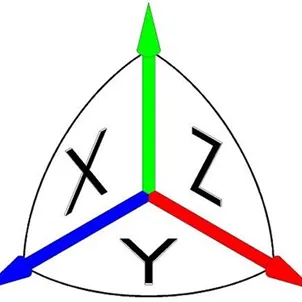

我們在機器學習基本概念中提到的f(x)=y。
所以f()，你可以視為那個空間概念，而x則是embedding也就是表示法，而y就是我們預期的結果。

## **舉例來說:**
可能聽到這邊我們還是有點陌生，我們再來舉個簡單的例子，我們的概念空間是從班級中挑出一個學生，那我們要想像的是怎樣表達代表一個學生呢? 可以想像的有身高、體重、髮型、血型、名字等等的作為我們的表示法，那這樣班級內的學生就可以用剛剛上述提到的身高，體重，髮型，血型，名字，這五個值，作為遷入在班級這個空間概念的表示法，只要給定這五項就能告訴你是哪個學生，那這種方式你也可以說自己說student embedding。

在傳統的語言模型，是採用詞袋(bag of words)的方式，將所有的詞視為向量中的一個位置表示，這種稱做one-hot的表示形式。下面用一個例子說明。

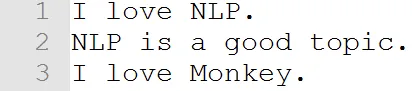

Set(corpus)=[*‘I’,’love’,’NLP’,’is’,’a’,’good’,’topic’,’monkey’*]

那麼整個向量表示法為長度為8的向量。第一個位置是I，第二個位置是love…以此類推，假如有那個字那個位置就是1不然就是0。 我們把上面三個句子根據one-hot下去做轉換。


第一句話:
[1,1,1,0,0,0,0,0]
第二句話:
[0,0,1,1,1,1,1,0]
第三句話:
[1,1,0,0,0,0,0,1]

## 這樣做會有怎樣的問題?


1. 無法表達詞跟詞之間的語意關係

因為每個詞都代表著一個位置，所以兩個詞之間的關係都會是正交關係，也就是垂直的，代表彼此之間沒有關係。
I=[1,0,0,0,0,0,0,0]
love=[0,1,0,0,0,0,0,0]
dot(I-vec,love-vec) = 0.0

2. 向量表示會很鬆散(Sparse)

大家可以想像，假如詞彙很多的時候，整個的向量長度會非常的長，那麼對於一句話來說，會只有少數幾個位置有值，大多數都是0，這樣的Data，再做machine learning 相關應用的時候，訓練起來會非常沒有效率，而且gradient很有可能是無意義的，因為很多值都是0。

*[Word2Vec](https://arxiv.org/pdf/1301.3781.pdf)，可以想像成一種分類應用的副產物。*

我這邊要說明一 下，不是說Word2Vec是分類應用做一做意外發現的，而是指，這項任務主要是在做一件分類應用，然後取其一部分作為Word Vector。

作者Tomas Mikolov，希望每個詞彙可以表達出他在語意上的意義，而想出了一個方法，一個詞彙的意義，或許可以用身邊的詞(Context)去表示他。 就像是自己身邊的朋友們，可以反映出自己是個怎麼樣的人一樣。

所以他基於這個概念，建了兩個模型去實作。分別是**CBOW**以及**Skip-gram**兩個模型。
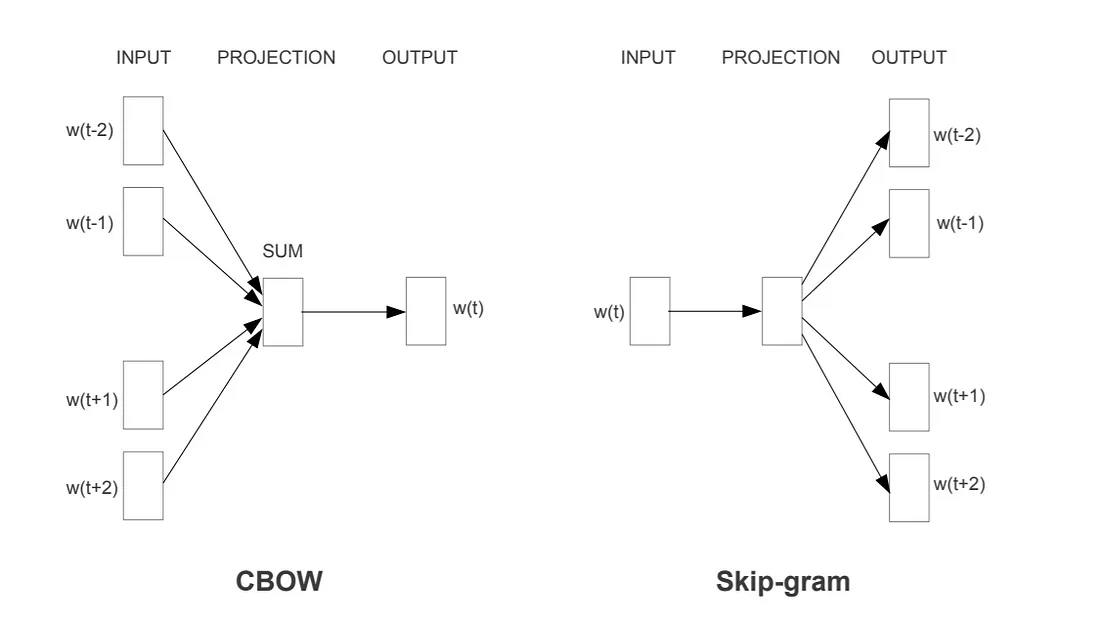

用例子來說明:
Corpus: I love NLP.
Window size = 1 (上下文的範圍)

CBOW:


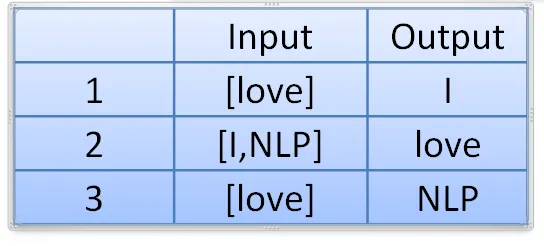

Skip-Gram:


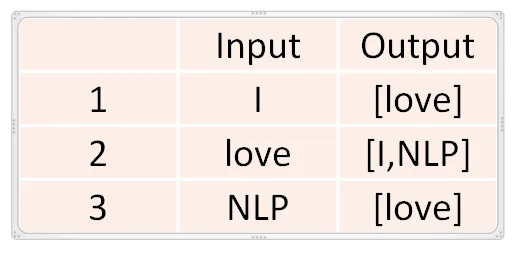

論文所提出來的架構


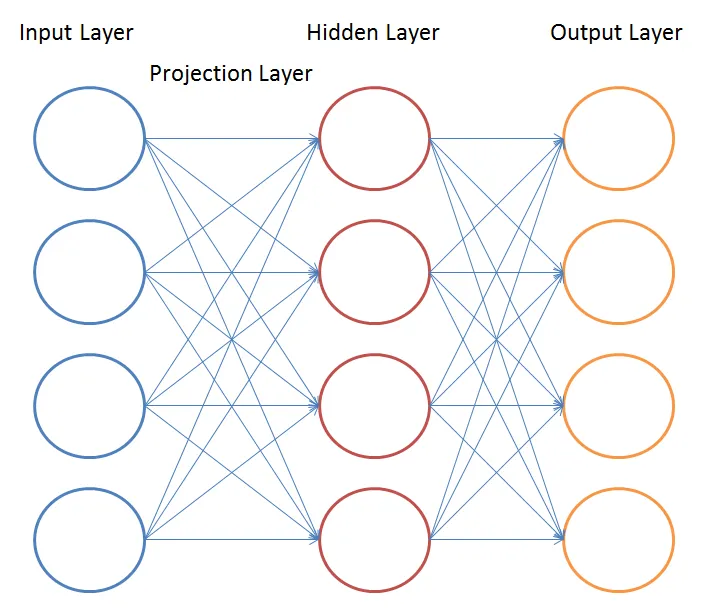


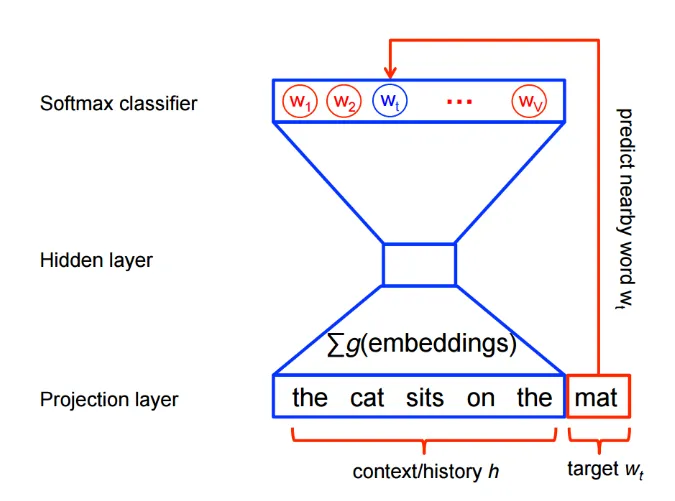

Skip-Gram


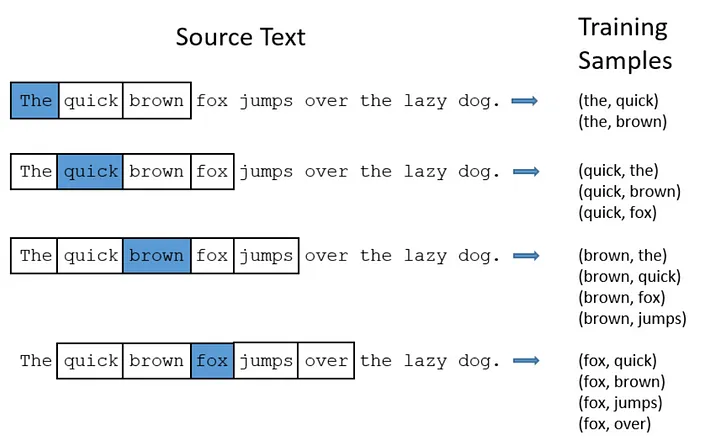